### __Machine Learning Models: Regression Test v3__

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import io
import requests
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image
import PIL.Image

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from scipy.stats import loguniform
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# import category encoders
#import category_encoders as ce

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.gaussian_process as gp
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Training Dataset import
train_df = pd.read_csv('data/training_for_regmodel_56k.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55754 entries, 0 to 55753
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mkt_carrier_fl_num       55754 non-null  int64  
 1   origin                   55754 non-null  int64  
 2   dest                     55754 non-null  int64  
 3   crs_dep_time             55754 non-null  int64  
 4   crs_arr_time             55754 non-null  int64  
 5   crs_elapsed_time         55754 non-null  float64
 6   distance                 55754 non-null  float64
 7   speed_passengers         55754 non-null  float64
 8   mean_passengers          55754 non-null  float64
 9   sum_passengers           55754 non-null  int64  
 10  total_cost:mean_fuel     55754 non-null  float64
 11  total_cost:sum_fuel      55754 non-null  float64
 12  total_gallons:mean_fuel  55754 non-null  float64
 13  total_gallons:sum_fuel   55754 non-null  float64
 14  avg_arr_delay         

,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,speed_passengers,mean_passengers,sum_passengers,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target
0,3672,186,765,1200,1735,215.0,1670.0,0.200252,12.0,184248,...,0,0,0,0,0,1,0,0,0,1.0
1,2772,2683,765,1330,1510,100.0,577.0,0.200252,12.0,184248,...,0,0,0,0,0,1,0,0,0,10.0
2,5397,2683,1137,740,915,275.0,1747.0,0.198394,12.0,184248,...,0,0,0,0,0,1,0,0,0,39.0
3,5344,2683,459,2245,10,85.0,356.0,0.317143,12.0,184248,...,0,0,0,0,0,1,0,0,0,23.0
4,3720,2683,324,2040,2220,100.0,515.0,0.301315,12.0,184248,...,0,0,0,0,0,1,0,0,0,61.0


#### __Standard Scale Numerical Variables__
> - mkt_carrier_fl_num
> - origin
> - dest
> - crs_dep_time
> - crs_arr_time
> - crs_elapsed_tim
> - distance
> - avg_arr_delay
> - speed_passengers
> - mean_passengers
> - sum_passengers
> - total_cost:mean_fuel
> - total_cost:sum_fuel
> - total_gallons:mean_fuel
> - total_gallons:sum_fuel

In [3]:
train_columns = train_df.columns.tolist()
train_columns

['mkt_carrier_fl_num',
 'origin',
 'dest',
 'crs_dep_time',
 'crs_arr_time',
 'crs_elapsed_time',
 'distance',
 'speed_passengers',
 'mean_passengers',
 'sum_passengers',
 'total_cost:mean_fuel',
 'total_cost:sum_fuel',
 'total_gallons:mean_fuel',
 'total_gallons:sum_fuel',
 'avg_arr_delay',
 'year_2018',
 'year_2019',
 'month_1',
 'month_12',
 'day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'mkt_unique_carrier_AA',
 'mkt_unique_carrier_AS',
 'mkt_unique_carrier_B6',
 'mkt_unique_carrier_DL',
 'mkt_unique_carrier_F9',
 'mkt_unique_carrier_G4',
 'mkt_unique_carrier_HA',
 'mkt_unique_carrier_NK',
 'mkt_unique_carrier_UA',
 'mkt_unique_carrier_VX',
 'mkt_unique_carrier_WN',
 'op_unique_carrier_9E',
 'op_unique_carrier_9K',
 'op_unique_carrier_AA',
 'op_unique_carrier_AS',
 'op_unique_carrier_AX',
 'op_unique_carrier_B6',
 'op_unique_carrier_C5',
 'op_unique_carrier_CP',
 'op_unique_carrier_DL',
 'op_unique_carri

In [4]:
# start time to measure the time of the program execution
start_time = time.time()

# get the numerical features & review their stats
feature_names_num = ['mkt_carrier_fl_num', 'origin', 'dest', 
                     'crs_dep_time', 'crs_arr_time',
                     'crs_elapsed_time', 'distance', 'avg_arr_delay',
                     'speed_passengers', 
                    'mean_passengers', 'sum_passengers',
                    'total_cost:mean_fuel', 'total_cost:sum_fuel',
                    'total_gallons:mean_fuel', 'total_gallons:sum_fuel', 'target']

var_scale = train_df[feature_names_num]
var_scale.describe()

# standard scale the numerical variables & make them into pd.dataframe
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(var_scale), columns = feature_names_num)
df_scale

# replace the numerical variables with the scaled variables
train_df2 = train_df.drop(feature_names_num, axis=1)

# combine dummy variables with work_df
train_df = pd.concat([train_df2, df_scale], axis=1)

# rearrange the columns in work_df3
train_df = train_df[train_columns]
train_df.info()
train_df.head()

# check
train_df.info()
train_df.head()
len(train_df.columns)
train_df.columns.tolist()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,avg_arr_delay,speed_passengers,mean_passengers,sum_passengers,total_cost:mean_fuel,total_cost:sum_fuel,total_gallons:mean_fuel,total_gallons:sum_fuel,target
count,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,55754.000000,5.575400e+04,5.575400e+04,5.575400e+04,5.575400e+04,55754.000000
mean,2748.304570,1012.882878,997.462281,1338.930713,1502.059458,140.642716,777.892528,5.051806,0.277535,6.734387,68827.574111,2.132893e+08,9.514731e+08,1.190007e+08,5.308032e+08,11.838864
std,1865.293128,807.539899,793.769312,485.921626,513.331589,72.559559,588.345478,10.683075,0.168339,5.495053,78465.461658,2.081243e+08,9.331774e+08,1.168457e+08,5.239692e+08,57.340828
min,1.000000,1.000000,1.000000,1.000000,1.000000,-46.000000,31.000000,-45.750000,0.000000,1.000000,333.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-230.000000
25%,1129.000000,338.000000,328.000000,930.000000,1115.000000,89.000000,343.000000,-1.343983,0.183325,1.000000,10347.000000,4.331830e+06,1.732732e+07,3.254995e+06,1.301998e+07,-13.000000
50%,2341.000000,989.000000,927.000000,1332.000000,1529.000000,122.000000,612.000000,3.352941,0.239257,12.000000,20704.000000,1.222033e+08,5.707640e+08,6.828546e+07,3.180274e+08,0.000000
75%,4347.750000,1399.000000,1329.000000,1736.000000,1925.000000,171.000000,1020.000000,9.369841,0.329493,12.000000,149232.000000,4.395839e+08,1.957070e+09,2.628255e+08,1.075575e+09,16.000000
max,9378.000000,2716.000000,2708.000000,2359.000000,2359.000000,702.000000,5095.000000,242.500000,7.681159,12.000000,235632.000000,5.319495e+08,2.538584e+09,2.957346e+08,1.334803e+09,1424.000000


,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,avg_arr_delay,speed_passengers,mean_passengers,sum_passengers,total_cost:mean_fuel,total_cost:sum_fuel,total_gallons:mean_fuel,total_gallons:sum_fuel,target
0,0.495206,-1.023962,-0.292861,-0.285914,0.453786,1.024785,1.516312,-0.955544,-0.459097,0.958255,1.470984,0.464488,0.309018,0.436554,0.284820,-0.189027
1,0.012703,2.068173,-0.292861,-0.018379,0.015469,-0.560134,-0.341456,0.054870,-0.459097,0.958255,1.470984,0.464488,0.309018,0.436554,0.284820,-0.032069
2,1.420002,2.068173,0.175793,-1.232578,-1.143636,1.851699,1.647189,-0.230965,-0.470138,0.958255,1.470984,0.464488,0.309018,0.436554,0.284820,0.473683
3,1.391588,2.068173,-0.678367,1.864658,-2.906645,-0.766863,-0.717089,0.501296,0.235290,0.958255,1.470984,0.464488,0.309018,0.436554,0.284820,0.194647
4,0.520939,2.068173,-0.848443,1.442775,1.398603,-0.560134,-0.446838,1.015669,0.141259,0.958255,1.470984,0.464488,0.309018,0.436554,0.284820,0.857357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55749,1.871945,0.161129,-1.058834,1.228747,1.057689,-1.028719,-1.118218,-0.039952,1.510598,-1.043564,-0.853512,-1.024826,-1.019615,-1.018453,-1.013052,-2.368994
55750,1.877843,0.213140,-0.678367,-0.228291,-0.177391,-0.518788,-0.615108,3.399244,0.325949,-1.043564,-0.853512,-1.024826,-1.019615,-1.018453,-1.013052,-0.223906
55751,1.881595,0.161129,-1.055054,-0.658406,-0.364406,-2.420691,-0.215679,0.242606,0.304120,-1.043564,-0.853512,-1.024826,-1.019615,-1.018453,-1.013052,-4.217606
55752,1.883740,-1.071019,0.184612,0.424083,0.685607,-0.160459,-0.259871,-1.203178,0.401293,-1.043564,-0.853512,-1.024826,-1.019615,-1.018453,-1.013052,-0.764538


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55754 entries, 0 to 55753
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mkt_carrier_fl_num       55754 non-null  float64
 1   origin                   55754 non-null  float64
 2   dest                     55754 non-null  float64
 3   crs_dep_time             55754 non-null  float64
 4   crs_arr_time             55754 non-null  float64
 5   crs_elapsed_time         55754 non-null  float64
 6   distance                 55754 non-null  float64
 7   speed_passengers         55754 non-null  float64
 8   mean_passengers          55754 non-null  float64
 9   sum_passengers           55754 non-null  float64
 10  total_cost:mean_fuel     55754 non-null  float64
 11  total_cost:sum_fuel      55754 non-null  float64
 12  total_gallons:mean_fuel  55754 non-null  float64
 13  total_gallons:sum_fuel   55754 non-null  float64
 14  avg_arr_delay         

,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,speed_passengers,mean_passengers,sum_passengers,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target
0,0.495206,-1.023962,-0.292861,-0.285914,0.453786,1.024785,1.516312,-0.459097,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,-0.189027
1,0.012703,2.068173,-0.292861,-0.018379,0.015469,-0.560134,-0.341456,-0.459097,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,-0.032069
2,1.420002,2.068173,0.175793,-1.232578,-1.143636,1.851699,1.647189,-0.470138,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.473683
3,1.391588,2.068173,-0.678367,1.864658,-2.906645,-0.766863,-0.717089,0.235290,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.194647
4,0.520939,2.068173,-0.848443,1.442775,1.398603,-0.560134,-0.446838,0.141259,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.857357


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55754 entries, 0 to 55753
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mkt_carrier_fl_num       55754 non-null  float64
 1   origin                   55754 non-null  float64
 2   dest                     55754 non-null  float64
 3   crs_dep_time             55754 non-null  float64
 4   crs_arr_time             55754 non-null  float64
 5   crs_elapsed_time         55754 non-null  float64
 6   distance                 55754 non-null  float64
 7   speed_passengers         55754 non-null  float64
 8   mean_passengers          55754 non-null  float64
 9   sum_passengers           55754 non-null  float64
 10  total_cost:mean_fuel     55754 non-null  float64
 11  total_cost:sum_fuel      55754 non-null  float64
 12  total_gallons:mean_fuel  55754 non-null  float64
 13  total_gallons:sum_fuel   55754 non-null  float64
 14  avg_arr_delay         

,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,speed_passengers,mean_passengers,sum_passengers,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target
0,0.495206,-1.023962,-0.292861,-0.285914,0.453786,1.024785,1.516312,-0.459097,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,-0.189027
1,0.012703,2.068173,-0.292861,-0.018379,0.015469,-0.560134,-0.341456,-0.459097,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,-0.032069
2,1.420002,2.068173,0.175793,-1.232578,-1.143636,1.851699,1.647189,-0.470138,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.473683
3,1.391588,2.068173,-0.678367,1.864658,-2.906645,-0.766863,-0.717089,0.235290,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.194647
4,0.520939,2.068173,-0.848443,1.442775,1.398603,-0.560134,-0.446838,0.141259,0.958255,1.470984,...,0,0,0,0,0,1,0,0,0,0.857357


66

['mkt_carrier_fl_num',
 'origin',
 'dest',
 'crs_dep_time',
 'crs_arr_time',
 'crs_elapsed_time',
 'distance',
 'speed_passengers',
 'mean_passengers',
 'sum_passengers',
 'total_cost:mean_fuel',
 'total_cost:sum_fuel',
 'total_gallons:mean_fuel',
 'total_gallons:sum_fuel',
 'avg_arr_delay',
 'year_2018',
 'year_2019',
 'month_1',
 'month_12',
 'day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'mkt_unique_carrier_AA',
 'mkt_unique_carrier_AS',
 'mkt_unique_carrier_B6',
 'mkt_unique_carrier_DL',
 'mkt_unique_carrier_F9',
 'mkt_unique_carrier_G4',
 'mkt_unique_carrier_HA',
 'mkt_unique_carrier_NK',
 'mkt_unique_carrier_UA',
 'mkt_unique_carrier_VX',
 'mkt_unique_carrier_WN',
 'op_unique_carrier_9E',
 'op_unique_carrier_9K',
 'op_unique_carrier_AA',
 'op_unique_carrier_AS',
 'op_unique_carrier_AX',
 'op_unique_carrier_B6',
 'op_unique_carrier_C5',
 'op_unique_carrier_CP',
 'op_unique_carrier_DL',
 'op_unique_carri



--- 0.3622474670410156 seconds ---


In [5]:
train_df.iloc[:, 65]

0       -0.189027
1       -0.032069
2        0.473683
3        0.194647
4        0.857357
           ...   
55749   -2.368994
55750   -0.223906
55751   -4.217606
55752   -0.764538
55753   -3.101463
Name: target, Length: 55754, dtype: float64

#### __Regression Models - Initialize__
> - Linear Regression
> - Ridge Regression
> - Lasso Regression
> - Decision Tree Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
> - Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
> - KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
> - XGBoost: https://machinelearningmastery.com/xgboost-for-regression/

> - Hyperparameter Tuning: Randomizer https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

PCA()

Variances (Percentage):
[2.75222140e+01 1.14619311e+01 9.90580886e+00 9.38446152e+00
 6.86373516e+00 5.42242279e+00 5.01330646e+00 3.72195730e+00
 3.05359581e+00 2.64255080e+00 1.78261394e+00 1.58572518e+00
 1.40908142e+00 1.14015504e+00 8.90110697e-01 8.49747309e-01
 7.87079609e-01 7.84785079e-01 7.70498858e-01 7.57395979e-01
 6.38774008e-01 4.34618346e-01 3.98889539e-01 3.33273465e-01
 2.72174821e-01 2.56661757e-01 2.27748763e-01 1.99516786e-01
 1.92897384e-01 1.66800797e-01 1.45213761e-01 1.22385449e-01
 1.16929208e-01 1.00023458e-01 9.60219289e-02 9.31071101e-02
 8.51547102e-02 7.19694025e-02 6.05642076e-02 5.61841056e-02
 4.66910844e-02 4.07032397e-02 3.16001729e-02 2.30577563e-02
 1.79207856e-02 1.18664642e-02 7.22640890e-03 1.48368610e-03
 6.55818215e-04 5.08714345e-04 1.94648216e-04 5.31360365e-06
 5.42779966e-30 2.56612979e-30 1.58417523e-31 1.58417523e-31
 1.58417523e-31 1.58417523e-31 1.58417523e-31 1.58417523e-31
 1.58417523e-31 1.58417523e-31 1.58417523e-31 1.55217294e-31


Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Explained variance (%)')

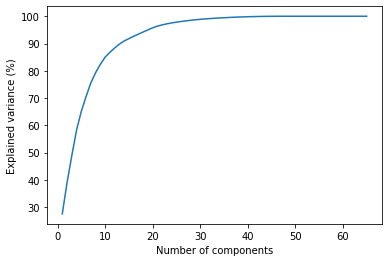

In [5]:
# Assign X & y
X = train_df.iloc[:, :65].values
y = train_df.iloc[:, 65].values

components = None
pca = PCA(n_components = components)# perform PCA on the scaled data
pca.fit(X)

# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components

plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

PCA(n_components=0.85)

Cumulative Variances (Percentage):
[27.52221398 38.9841451  48.88995397 58.27441548 65.13815064 70.56057343
 75.57387989 79.29583719 82.349433   84.9919838  86.77459774]
Number of components: 11


Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Explained variance (%)')

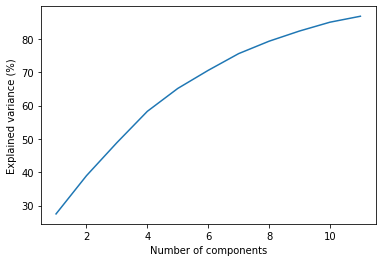

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(X)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [7]:
pca_components = abs(pca.components_)
print(pca_components)
pca_df = pd.DataFrame(pca_components, index=['component 1', 'component 2',
                            'component 3', 'component 4', 'component 5', 'component 6',
                            'component 7', 'component 8', 'component 9', 'component 10',
                                            'component 11'], 
                        columns=[train_df.columns.tolist()[:65]])
pca_df

[[2.87012540e-01 8.95444030e-02 8.96573052e-02 6.72557946e-03
  4.11535701e-03 2.07174504e-01 2.17777739e-01 6.84907488e-02
  2.99408781e-02 2.14889907e-01 4.27692947e-01 4.21464503e-01
  4.27309528e-01 4.21192948e-01 1.48102234e-01 2.43484339e-03
  2.43484339e-03 1.49568389e-02 1.49568389e-02 1.13009591e-03
  1.07491090e-03 8.43873848e-04 7.08126263e-04 3.81353005e-05
  6.47984786e-04 6.05557509e-04 6.31784264e-03 1.24591733e-02
  5.00936303e-03 2.56243103e-02 3.69795135e-03 3.22054868e-03
  3.63426182e-03 4.03929934e-03 1.43099896e-02 3.52477655e-04
  2.74165971e-02 1.35532402e-02 5.73001359e-05 6.25220339e-02
  2.58795577e-03 4.94535237e-03 5.00936303e-03 3.99201394e-03
  5.36952511e-03 6.73166741e-02 4.20243990e-04 1.02638677e-02
  3.69795135e-03 3.22054868e-03 5.07480780e-03 3.21401783e-03
  1.27215139e-04 1.74372174e-02 4.03929934e-03 1.88571845e-02
  4.36295132e-02 7.86511010e-03 7.46486326e-03 4.11160877e-02
  3.52477655e-04 2.74165971e-02 1.39271893e-02 1.71580109e-02
  6.1071

,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,speed_passengers,mean_passengers,sum_passengers,...,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
component 1,0.287013,0.089544,0.089657,0.006726,0.004115,0.207175,0.217778,0.068491,0.029941,0.214890,...,0.018857,0.043630,0.007865,0.007465,0.041116,0.000352,0.027417,0.013927,0.017158,0.006107
component 2,0.097756,0.010919,0.022055,0.020251,0.004083,0.118452,0.114165,0.043383,0.653367,0.548130,...,0.002125,0.020408,0.000841,0.000848,0.002831,0.001752,0.019635,0.001485,0.000470,0.000357
component 3,0.000210,0.317852,0.335364,0.624130,0.609555,0.064482,0.045031,0.121317,0.025975,0.005521,...,0.000531,0.000439,0.001170,0.001162,0.004713,0.000096,0.004451,0.001051,0.000358,0.001029
component 4,0.101700,0.007463,0.027855,0.033620,0.063581,0.631064,0.627055,0.145556,0.141920,0.000811,...,0.005646,0.003011,0.004915,0.002097,0.014559,0.002653,0.049610,0.000755,0.007151,0.001827
component 5,0.070704,0.482065,0.579085,0.311670,0.344767,0.067990,0.041136,0.440694,0.006702,0.013683,...,0.004250,0.006684,0.004707,0.001965,0.017041,0.000260,0.013060,0.005578,0.000252,0.001138
component 6,0.199334,0.518045,0.072989,0.082938,0.102694,0.130470,0.117052,0.651000,0.010077,0.041342,...,0.013270,0.003294,0.007079,0.000763,0.015458,0.000067,0.027881,0.017152,0.003181,0.005220
component 7,0.128188,0.037946,0.242636,0.004023,0.002726,0.056839,0.050222,0.401446,0.029100,0.013591,...,0.015036,0.021139,0.012295,0.011813,0.064660,0.001667,0.075435,0.005337,0.008929,0.000037
component 8,0.636079,0.323816,0.429192,0.029473,0.055333,0.080019,0.020315,0.304954,0.044444,0.064535,...,0.023947,0.076792,0.001579,0.025855,0.034432,0.000347,0.164473,0.025102,0.029613,0.003896
component 9,0.570311,0.428953,0.432954,0.042811,0.006314,0.115954,0.138708,0.030530,0.135310,0.141539,...,0.009035,0.036499,0.000311,0.019298,0.001810,0.002551,0.223019,0.023909,0.000534,0.008534
component 10,0.037233,0.001894,0.009516,0.001385,0.001105,0.009069,0.000300,0.015680,0.001134,0.003623,...,0.004266,0.003818,0.002923,0.001050,0.007299,0.003443,0.012539,0.001938,0.002259,0.000160


In [10]:
#For curiosity, let’s print out the top 3 features that contributes the most to each of the 11 components:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 3 values in each row
    temp = np.argpartition(-(pca_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:3]
    
    # print the top 8 feature names
    print(f'Component {row}: {train_df.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['total_cost:mean_fuel', 'total_gallons:mean_fuel', 'total_cost:sum_fuel']
Component 1: ['mean_passengers', 'sum_passengers', 'month_12']
Component 2: ['crs_dep_time', 'crs_arr_time', 'dest']
Component 3: ['crs_elapsed_time', 'distance', 'total_cost:sum_fuel']
Component 4: ['dest', 'origin', 'speed_passengers']
Component 5: ['speed_passengers', 'origin', 'avg_arr_delay']
Component 6: ['avg_arr_delay', 'speed_passengers', 'dest']
Component 7: ['mkt_carrier_fl_num', 'dest', 'origin']
Component 8: ['mkt_carrier_fl_num', 'dest', 'origin']
Component 9: ['year_2018', 'year_2019', 'mkt_carrier_fl_num']
Component 10: ['mkt_unique_carrier_AA', 'op_unique_carrier_AA', 'sum_passengers']


In [11]:
#from sklearn.pipeline import Pipeline

#_sc = StandardScaler()
_pca = PCA(n_components = 11)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [12]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model1 = LinearRegression()
lr = Pipeline([
    ('pca', _pca),
    ('regressor', _model1)
])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('regressor', LinearRegression())])



--- 0.3319859504699707 seconds ---


In [13]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model2 = Ridge()
rr = Pipeline([
    ('pca', _pca),
    ('regressor', _model2)
])
#rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)), ('regressor', Ridge())])



--- 0.38651585578918457 seconds ---


In [14]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model3 = Lasso()
ls = Pipeline([
    ('pca', _pca),
    ('regressor', _model3)
])
#ls = Lasso()
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)), ('regressor', Lasso())])



--- 0.3258047103881836 seconds ---


In [15]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model4 = DecisionTreeRegressor(random_state=0)
dr = Pipeline([
    ('pca', _pca),
    ('regressor', _model4)
])
#dr = DecisionTreeRegressor(random_state=0)
dr.fit(X_train, y_train)
y_pred_dr = dr.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('regressor', DecisionTreeRegressor(random_state=0))])



--- 2.54203200340271 seconds ---


In [16]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model5 = RandomForestRegressor(random_state=0)
rfr = Pipeline([
    ('pca', _pca),
    ('regressor', _model5)
])
#rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('regressor', RandomForestRegressor(random_state=0))])



--- 177.37559270858765 seconds ---


In [17]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model6 = KNeighborsRegressor()
knn = Pipeline([
    ('pca', _pca),
    ('regressor', _model6)
])
#knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('regressor', KNeighborsRegressor())])



--- 3.2542762756347656 seconds ---


In [18]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Model
_model7 = XGBRegressor()
xgb = Pipeline([
    ('pca', _pca),
    ('regressor', _model7)
])
#xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])



--- 13.359199285507202 seconds ---


In [19]:
# start time to measure the time of the program execution
start_time = time.time()

# function for measuring the performance of regression models
def regression_metrics(y_test, X_test, y_pred_lst, n, k):
    
    linear_r = []
    ridge = []
    lasso = []
    decision_r = []
    rf_r = []
    knn_r = []
    xgb_r = []
    
    model_lst = [linear_r, ridge, lasso, decision_r, rf_r, knn_r, 
                 xgb_r]
    
    n= 0
    
    # for each y_pred in the list, compute the metrics
    for item in y_pred_lst:
        r2_test = r2_score(y_test, item)
        adjusted_R2 = 1 - ((n - 1) / (n - k - 1)) * (1 - r2_test)
        mae_test = mean_absolute_error(y_test, item)
        mse_test = mean_squared_error(y_test, item)
        rmse_test = np.sqrt(mean_squared_error(y_test, item))
        
        model_lst[n] = [r2_test, adjusted_R2, mae_test, mse_test, rmse_test]
        n += 1
        
    df_metrics_summary = pd.DataFrame({'linear_reg': model_lst[0], 'ridge': model_lst[1], 'lasso': model_lst[2],
                                    'decision_reg': model_lst[3], 'random_forest': model_lst[4], 
                                    'knn': model_lst[5], 'xgboost': model_lst[6]},
                                      index = ['R2', 'Adjusted_R2','MAE', 'MSE', 'RMSE'])

    return df_metrics_summary

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0004971027374267578 seconds ---


In [20]:
# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

n = len(X_test)
k = len(train_df.columns.tolist())-1

y_pred_lst = [y_pred_lr, y_pred_rr, y_pred_ls, y_pred_dr, y_pred_rfr,
              y_pred_knn, y_pred_xgb]

regression_metrics(y_test, X_test, y_pred_lst, n, k)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.03115701675415039 seconds ---


,linear_reg,ridge,lasso,decision_reg,random_forest,knn,xgboost
R2,0.040690,0.040689,-0.000003,-1.127958,-0.045368,-0.127716,-0.013302
Adjusted_R2,0.985465,1.000000,1.015625,1.067554,1.050582,1.073949,1.084442
MAE,0.489845,0.489845,0.501952,0.716591,0.530227,0.549384,0.503372
MSE,0.936339,0.936340,0.976057,2.077002,1.020336,1.100712,0.989038
RMSE,0.967646,0.967646,0.987956,1.441181,1.010117,1.049148,0.994504




--- 0.07780218124389648 seconds ---


#### __RandomizedSearchCV__
> - Reference Link: https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
> - sklearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

   
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [50, 100, 500]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='r2',
                         n_iter=25,
                         verbose=1)

grid_result = clf.fit(X_train, y_train)

print("Best parameters:", grid_result.best_params_)
print("R2: ", (grid_result.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.6}
R2:  0.04695498824705184


In [22]:
best_r2 = grid_result.best_score_
best_model = grid_result.best_estimator_ 
y_pred_xgbclf = best_model.predict(X_test)
r2_test_xg = r2_score(y_test, y_pred_xgbclf)

In [23]:
adjusted_R2_xg = 1 - ((n - 1) / (n - k - 1)) * (1 - r2_test_xg)
mae_test_xg = mean_absolute_error(y_test, y_pred_xgbclf)
mse_test_xg = mean_squared_error(y_test, y_pred_xgbclf)
rmse_test_xg = np.sqrt(mean_squared_error(y_test, y_pred_xgbclf))

print(f"R2 = {r2_test_xg}")
print(f"Adjusted R2 = {adjusted_R2_xg}")
print(f"MAE = {mae_test_xg}")
print(f"MSE = {mse_test_xg}")
print(f"RMSE = {rmse_test_xg}")

R2 = 0.04158199717113542
Adjusted R2 = 0.03596204496690669
MAE = 0.48870206472723754
MSE = 0.9354678427315208
RMSE = 0.9671958657539438


#### __RFE: Feature Selection__

In [18]:
X.shape[1]
len(train_df.columns.tolist())-1

51

51

In [20]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
for n in range(X.shape[1]):
    # define RFE
    rfe = RFE(estimator=Ridge(), n_features_to_select=n)
    # fit RFE
    rfe.fit(X_train, y_train)
    
    y_pred_xgb0 = rfe.predict(X_test)
    r2_test0 = r2_score(y_test, y_pred_xgb0)
    
    if r2_test0 > 0:
        # summarize all features
        print('Column: %d, Selected %s, Rank: %.3f' % (n, rfe.support_[n], rfe.ranking_[n]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

ValueError: Found array with 0 feature(s) (shape=(13015, 0)) while a minimum of 1 is required.